# Machine Learning Group Final Project

### Overview

In this project, we hope to compare the efficacies of SVM vs CNN methods for image classification. We will attempt to find the simplest kernel function and simplest convolutional net that give us the highest accuracy results, while avoiding overfitting. We will compare and contrast the two models and discuss the differences between them. 

### Environment

All coding will be done using Python and hosted in [Google Colab](https://colab.research.google.com). We will be utilizing popular and powerful Python libraries such as Keras, Pytorch, and Scikit-Learn. 

For our image data, we will be using the popular and widely accessible [CIFAR-10](https://www.cs.toronto.edu/%7Ekriz/cifar.html). The dataset can be downloaded from that link, or be imported using the Python libraries mentioned above, which we will be doing here.

### Links

- [Keras](https://keras.io/)
- [Pytorch](https://pytorch.org)
- [Scikit-Learn](https://scikit-learn.org/stable/modules/svm.html)


In [1]:
# imports
import os
import time
import numpy as np
import matplotlib.pyplot as plt

# importing cifar10 dataset
# 60k images overall
# the first 50k are for training while 10k are for testing
from keras.datasets import cifar10

# defining class names based on cifar10 provided classes
# can be useful for printing using plt
CLASSES = ['airplane', 'automobile', 'bird',
           'cat', 'deer', 'dog', 'frog', 
           'horse', 'ship', 'truck']

# load the data into train and test variables
# do not change these variables, so both models can work with it
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


## CNN Model

Implementation for the convolutional neural network using Keras.

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)
Epoch 1/10
1532/1532 [==============================] - 247s 161ms/step - loss: 1.5510 - accuracy: 0.4333 - val_loss: 1.1403 - val_accuracy: 0.5930
Epoch 2/10
1532/1532 [==============================] - 244s 160ms/step - loss: 1.1905 - accuracy: 0.5779 - val_loss: 0.9875 - val_accuracy: 0.6520
Epoch 3/10
1532/1532 [==============================] - 244s 159ms/step - loss: 1.0512 - accuracy: 0.6310 - val_loss: 0.9144 - val_accuracy: 0.6860
Epoch 4/10
1532/1532 [==============================] - 247s 161ms/step - loss: 0.9654 - accuracy: 0.6638 - val_loss: 0.9061 - val_accuracy: 0.6870
Epoch 5/10
1532/1532 [==============================] - 247s 161ms/step - loss: 0.9036 - accuracy: 0.6836 - val_loss: 0.8137 - val_accuracy: 0.7240
Epoch 6/10
1532/1532 [==============================] - 249s 162ms/step - loss: 0.8511 - accuracy: 0.7014 - val_loss: 0.8110 - val_accuracy: 0.7360
Epoch 7/10
1532/1532 [====

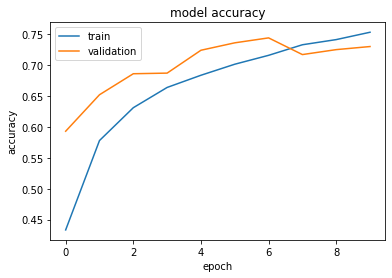

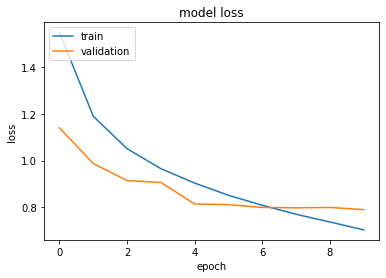

313/313 [==============================] - 12s 38ms/step - loss: 0.8075 - accuracy: 0.7221


[0.8075287938117981, 0.722100019454956]

In [ ]:
# import keras modules for cnn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.optimizers import Adam 
#from keras import history

# # building the input vector from the 32x32 pixels
X_train = xTrain.reshape(xTrain.shape[0], 32, 32, 3)
X_test = xTest.reshape(xTest.shape[0], 32, 32, 3)
X_train = xTrain.astype('float32')
X_test = xTest.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", yTrain.shape)
Y_train = np_utils.to_categorical(yTrain, n_classes)
Y_test = np_utils.to_categorical(yTest, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()

# 1st convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # 2nd convolutional layer
# model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# 3rd convolutional layer
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer (2 MLP layers)
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=1e-3))

# training the model for 10 epochs, 1000 total examples for validation 
history = model.fit(X_train, Y_train, epochs=10, validation_split=.02)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Test trained model: 
# (Batch size 32 = 313 batches for 10k examples)
model.evaluate(X_test, Y_test) 



## SVM Model

Implementation for the support vector machine using Keras and Sklearn.

Alpha: 0.0001, Score: 0.3866734693877551


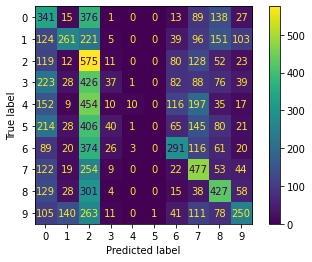

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Alpha: 0.001, Score: 0.42814285714285716


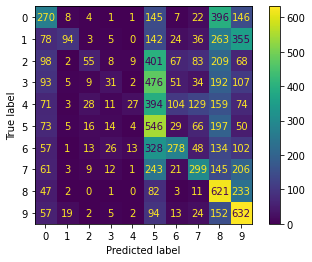

Alpha: 0.01, Score: 0.3346530612244898


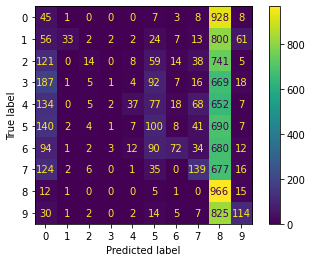

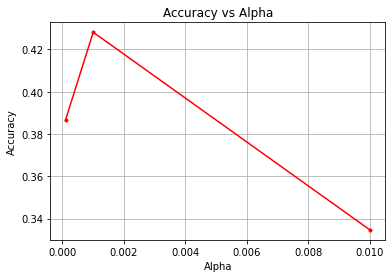

In [2]:
# import svm for use of svc
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

# constants, change size and kernel for testing
CVALS = [0.1, 1, 10]
SIZE = 0
KERNEL = 'linear' # kernal: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
SGD = True
ALPHA = [.0001, .001, .01]
ETA0 = [.00001, .001, .1] # initial learning rate, not used in 'optimal'
LR = 'optimal' # 'constant', 'optimal', 'invscaling', 'adaptive'

# plots a graph of the training vs test data using the SVC method
def plotSVC(accTrainArray, accTestArray):
    plt.plot(CVALS, accTrainArray, '.-', color='green')
    plt.plot(CVALS, accTestArray, '.-', color='purple')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs C, Training Size = {SIZE}, Kernel = {KERNEL}')
    plt.grid()
    plt.show()

# loops over the c values, fits, returns results in an array
def runSVC(xTrainSvm, yTrainSvm, xValueSvm, yValueSvm):

    accTrainArray = []
    accTestArray = []

    for c in CVALS:
        # kernal: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
        # C: 0.001, 0.01, 0.1, 1, 10, 100
        # strength of the regularization is inversely proportional to C
        svc = svm.SVC(probability = False, kernel = KERNEL, C = c)
        svc.fit(xTrainSvm, yTrainSvm)

        # predict and print accuracy
        predictedTrainY = svc.predict(xTrainSvm)
        accuracyTrain = np.mean(predictedTrainY == yTrainSvm)
        accTrainArray.append(accuracyTrain)

        predictedTestY = svc.predict(xValueSvm)
        accuracyTest = np.mean(predictedTestY == yValueSvm)
        accTestArray.append(accuracyTest)

        print(f'C Value: {c}, Training Set Size: {SIZE}')
        print(f'Train Accuracy: {accuracyTrain}')
        print(f'Test Accuracy: {accuracyTest} \n')

    return accTrainArray, accTestArray

# plots the array of SGD scores
def plotSGD(scores):
    plt.plot(ALPHA, scores, '.-', color='red')
    plt.xlabel('Alpha')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Alpha')
    plt.grid()
    plt.show()

# loops over alpha or eta values, fits, and returns a scores array
def runSGD(xTrainSvm, yTrainSvm, xTestSvm, yTestSvm):
    
    scores = []

    for a in ALPHA:
    # for e in ETA0:
        sgd = SGDClassifier(n_jobs = -1, alpha=a, learning_rate=LR)
        sgd.fit(xTrainSvm, yTrainSvm)
        score = sgd.score(xTrainSvm, yTrainSvm)

        print(f'Alpha: {a}, Score: {score}')
        # print(f'LR: {e}, Score: {score}')
        scores.append(score)

        predictedY = sgd.predict(xTestSvm)

        matrix = metrics.confusion_matrix(yTestSvm, predictedY)
        matrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix)
        matrixDisplay.plot()
        plt.show()
    
    return scores

# setup for the values, training, and test data
# shapes using np and normalizes, then calls appropriate function
def runSVM():
    # 49000 images for training and 1000 for validation
    # remaining 10000 are for testing the training result
    xValueSvm = xTrain[49000:, :].astype(float)
    yValueSvm = np.squeeze(yTrain[49000:, :])
    xTrainSvm = xTrain[:49000, :].astype(float)
    yTrainSvm = np.squeeze(yTrain[:49000, :])
    xTestSvm = xTest.astype(float)
    yTestSvm = np.squeeze(yTest)

    # reshape data into and vector
    # then normalize, though this step is optional gives different output
    # from my readings, the -1 is to calculate one dimension using the other
    xTrainSvm = np.reshape(xTrainSvm, (xTrainSvm.shape[0], -1))
    xValueSvm = np.reshape(xValueSvm, (xValueSvm.shape[0], -1))
    xTestSvm = np.reshape(xTestSvm, (xTestSvm.shape[0], -1))

    xTrainSvm = ((xTrainSvm / 255) * 2) -1

    # now we can choose to use a smaller dataset
    if SIZE != 0:
        xTrainSvm = xTrainSvm[:SIZE, :]
        yTrainSvm = yTrainSvm[:SIZE]

    # use SGD or SVC based on boolean global
    if SGD: 
        scores = runSGD(xTrainSvm, yTrainSvm, xTestSvm, yTestSvm)
        plotSGD(scores)
    else:
        accTrainArray, accTestArray = runSVC(xTrainSvm, yTrainSvm, xValueSvm, yValueSvm)
        plotSVC(accTrainArray, accTestArray)

# entry point
runSVM()